In [123]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
file_path = '2025_Problem_C_Data/summerOly_medal_counts_utf8.csv'
df = pd.read_csv(file_path)

In [125]:
df

,Rank,NOC,Gold,Silver,Bronze,Total,Year
0,1,United States,11,7,2,20,1896
1,2,Greece,10,18,19,47,1896
2,3,Germany,6,5,2,13,1896
3,4,France,5,4,2,11,1896
4,5,Great Britain,2,3,2,7,1896
...,...,...,...,...,...,...,...
1430,84,Qatar,0,0,1,1,2024
1431,84,Refugee Olympic Team,0,0,1,1,2024
1432,84,Singapore,0,0,1,1,2024
1433,84,Slovakia,0,0,1,1,2024


In [126]:
pivot_data = df.pivot(index='Year', columns='NOC', values='Total').fillna(0)
pivot_data
pivot_data.to_csv('pivot_data.csv', index=True)


/var/folders/57/f1b6dp4j2g96pfwxt0xskpxr0000gn/T/ipykernel_10495/3887171609.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


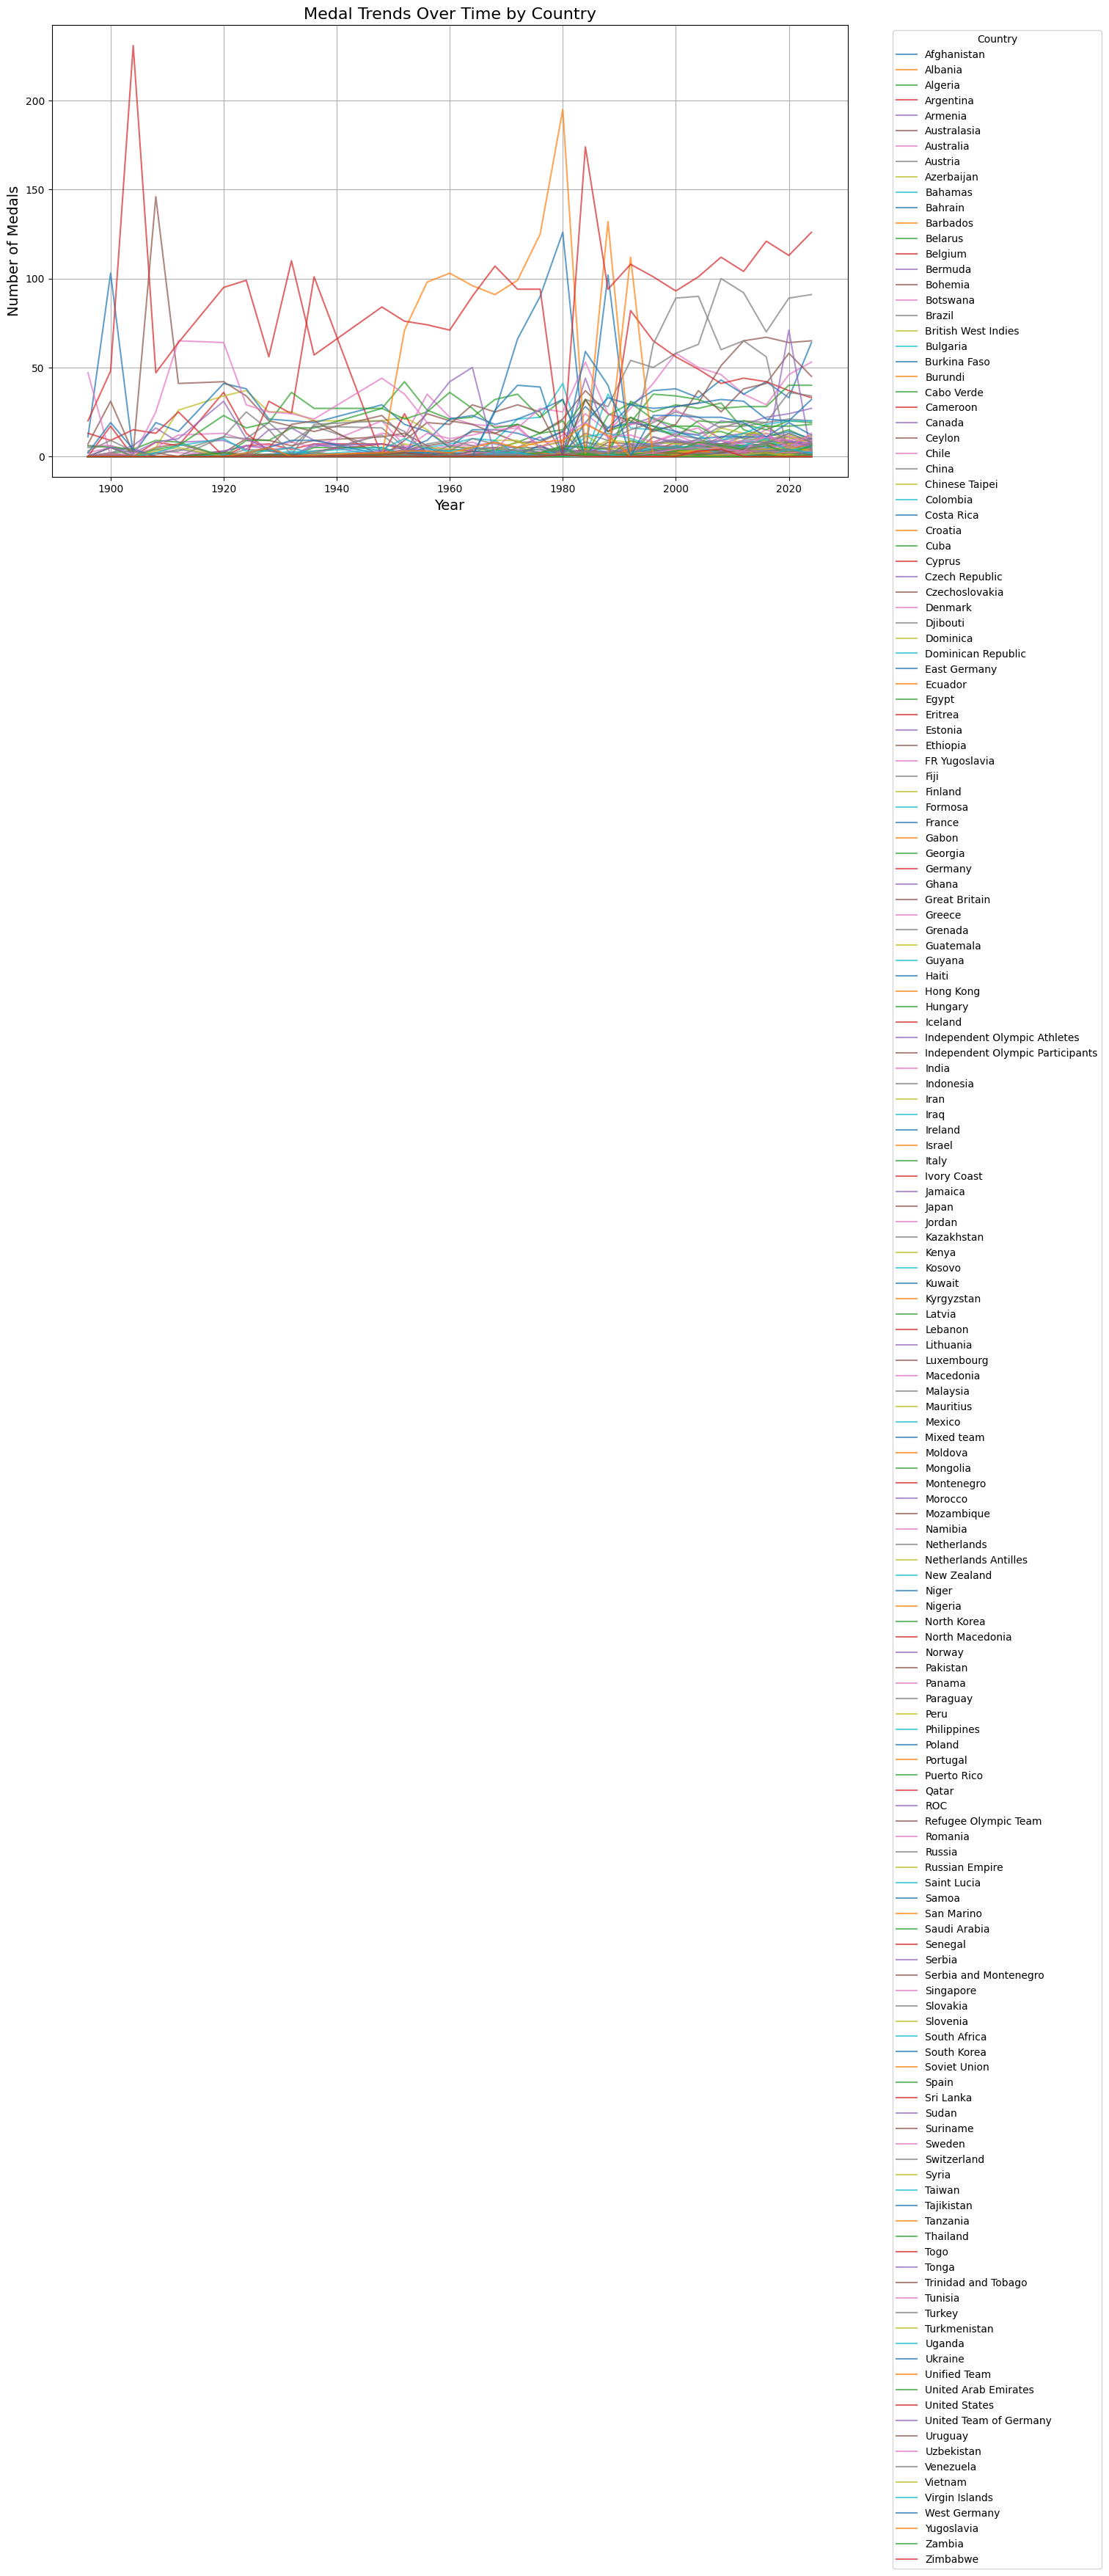

In [127]:

# Plot
plt.figure(figsize=(14, 8))

# Plot a line for each country
for country in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[country], label=country, alpha=0.7)

plt.title("Medal Trends Over Time by Country", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Medals", fontsize=14)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

In [128]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [129]:

# Step 1: Filter data for the last five Olympic years
last_five_years = [2000, 2004, 2008, 2012, 2016]  # Adjust as necessary
pivot_data_last_five_years = pivot_data.loc[last_five_years]

# Step 2: Extract actual data for 2024
actual_2024_data = pivot_data.loc[2024]  # Assuming 2024 data exists in pivot_data

# Step 3: Train linear regression models for each country
regressor = LinearRegression()
predictions_2024 = {}  # Store predictions

# Features (years) and reshape for sklearn
X = np.array(last_five_years).reshape(-1, 1)  # Independent variable (years)

for country in pivot_data.columns:
    # Medal counts for the last five years for the current country
    y = pivot_data_last_five_years[country].values
    
    # Train a linear regression model
    regressor.fit(X, y)
    
    # Predict medal count for 2024
    predictions_2024[country] = regressor.predict([[2024]])[0]

# Step 4: Compare predictions with actual 2024 data
# Convert predictions and actual data to Series for easier alignment
predicted_2024 = pd.Series(predictions_2024)
predicted_2024 = predicted_2024.clip(lower=0)
actual_2024 = actual_2024_data

# Ensure alignment of indices
aligned_actual = actual_2024[actual_2024.index.isin(predicted_2024.index)]
aligned_predicted = predicted_2024[aligned_actual.index]

# Step 5: Calculate Mean Squared Error (MSE)
mse = mean_squared_error(aligned_actual, aligned_predicted)
print(f"Mean Squared Error (MSE) for 2024 predictions: {mse:.2f}")

# Display predictions vs actual data
comparison = pd.DataFrame({
    "Predicted": aligned_predicted,
    "Actual": aligned_actual
})
print(comparison)

Mean Squared Error (MSE) for 2024 predictions: 39.22
                Predicted  Actual
NOC                              
Afghanistan           0.8     0.0
Albania               0.0     2.0
Algeria               0.0     3.0
Argentina             4.0     3.0
Armenia               5.6     4.0
...                   ...     ...
Virgin Islands        0.0     0.0
West Germany          0.0     0.0
Yugoslavia            0.0     0.0
Zambia                0.0     1.0
Zimbabwe              0.2     0.0

[164 rows x 2 columns]


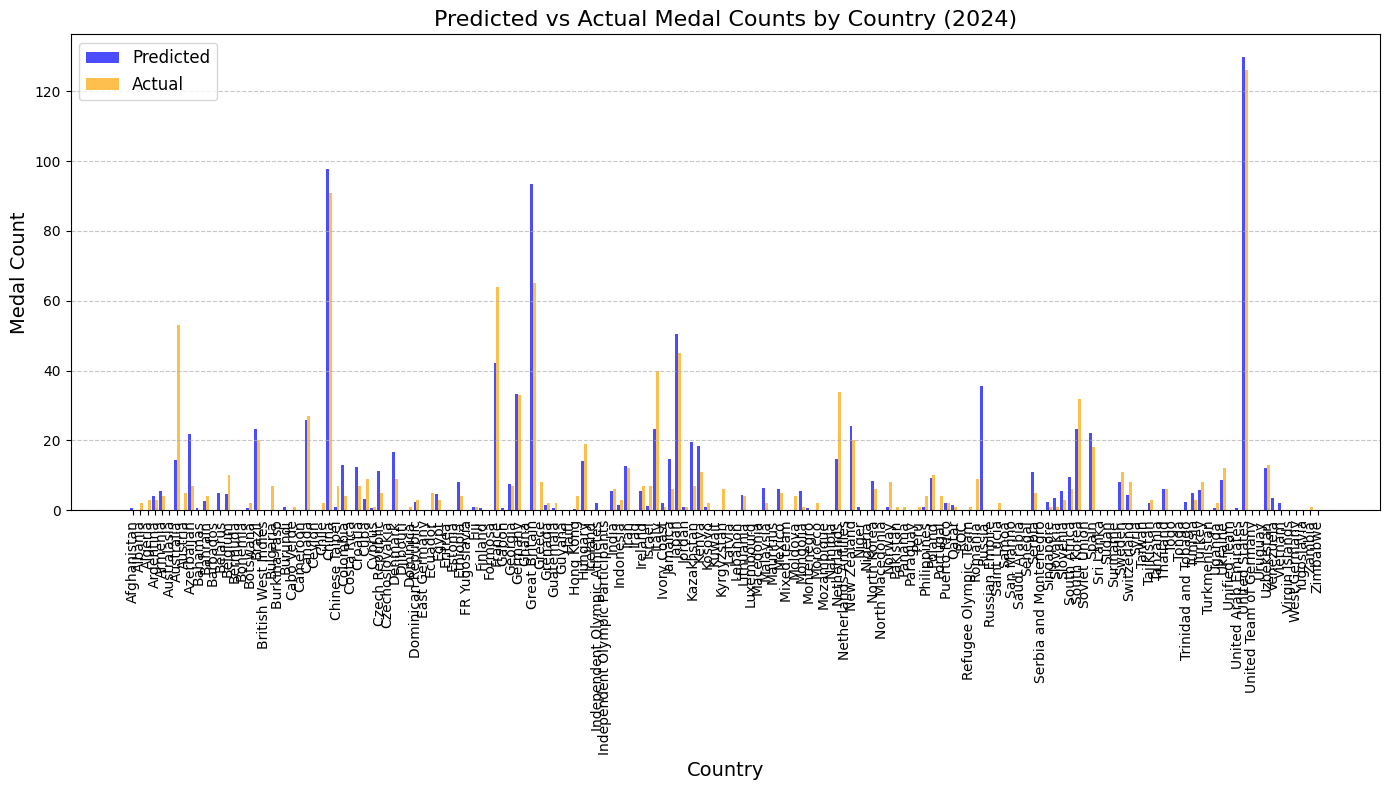

In [150]:
# Step 1: Create a bar plot
x = np.arange(len(aligned_actual))  # Positions for each country on the x-axis
width = 0.4  # Width of the bars

plt.figure(figsize=(14, 8))

# Plot predicted and actual counts
plt.bar(x - width / 2, aligned_predicted, width, label="Predicted", color='blue', alpha=0.7)
plt.bar(x + width / 2, aligned_actual, width, label="Actual", color='orange', alpha=0.7)

# Step 2: Add labels and title
plt.title("Predicted vs Actual Medal Counts by Country (2024)", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Medal Count", fontsize=14)
plt.xticks(x, aligned_actual.index, rotation=90, fontsize=10)  # Country names on x-axis
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Step 3: Adjust layout and display the plot
plt.tight_layout()
plt.show()



In [ ]:
correlation = np.corrcoef(comparison_cleaned['Total'], comparison_cleaned['Predicted_Medals_2024'])[0, 1]
print(f"Pearson Correlation Coefficient: {correlation:.2f}")

In [131]:
# Testing the number of athlete vs. total medal counts

athlete = pd.read_csv('2025_Problem_C_Data/summerOly_athletes_utf8.csv')

In [132]:
athlete.columns

Index(['Name', 'Sex', 'Team', 'NOC', 'Year', 'City', 'Sport', 'Event',
       'Medal'],
      dtype='object')

In [133]:
athlete.loc[athlete['NOC'] == 'AIN', 'NOC'] = 'RUS'
athlete.loc[athlete['NOC'] == 'RUS', 'Team'] = 'Russia'
athlete = athlete.rename(columns={'NOC': 'NOC_Code'})
athlete = athlete.rename(columns={'Team': 'NOC'})

In [135]:
athletes_per_country_year = athlete.groupby(['NOC', 'Year']).size().reset_index(name='Num_Athletes')
athletes_per_country_year

,NOC,Year,Num_Athletes
0,30. Februar,1952,2
1,A North American Team,1900,4
2,Acipactli,1964,3
3,Acturus,1948,2
4,Afghanistan,1936,16
...,...,...,...
4509,Zimbabwe,2016,31
4510,Zimbabwe,2020,5
4511,Zimbabwe,2024,7
4512,Zut,1908,3


In [136]:
# Step 2: Filter the medal counts data for the last five Olympic years (2000, 2004, 2008, 2012, 2016)
last_five_years = [2000, 2004, 2008, 2012, 2016]
historical_data = df[df['Year'].isin(last_five_years)]

# Step 3: Merge the athlete data with the medal counts data
merged_data = pd.merge(athletes_per_country_year, historical_data[['NOC', 'Year', 'Total']], on=['NOC', 'Year'])

# Step 4: Train the linear regression model using the last 5 years' data
X = merged_data[['Num_Athletes']]  # Number of athletes as feature
y = merged_data['Total']  # Total medals as target


In [145]:
# Initialize and train the linear regression model
regressor = LinearRegression()
regressor.fit(X, y)

# Step 5: Make predictions for 2024 using the number of athletes for 2024
athletes_2024 = athletes_per_country_year[athletes_per_country_year['Year'] == 2024]
X_2024 = athletes_2024[['Num_Athletes']]  # Number of athletes for 2024
predicted_medals_2024 = regressor.predict(X_2024)

# Add the predictions to the dataframe
athletes_2024['Predicted_Medals_2024'] = predicted_medals_2024

# Display the predictions
print(athletes_2024[['NOC', 'Num_Athletes', 'Predicted_Medals_2024']])

# Step 6: Compare predictions with actual 2024 data (if available)
actual_2024_data = df[df['Year'] == 2024][['NOC', 'Total']]

# Merge predictions with actual data
comparison = pd.merge(athletes_2024, actual_2024_data, on='NOC', how='left')

# Display the comparison
print(comparison)

                     NOC  Num_Athletes  Predicted_Medals_2024
19           Afghanistan             7              -2.510073
31               Albania             9              -2.310528
52               Algeria            55               2.278987
71        American Samoa             2              -3.008933
90               Andorra             4              -2.809389
...                  ...           ...                    ...
4411   Virgin Islands, B             4              -2.809389
4412  Virgin Islands, US             5              -2.709617
4455               Yemen             4              -2.809389
4495              Zambia            32              -0.015771
4511            Zimbabwe             7              -2.510073

[206 rows x 3 columns]
                    NOC  Year  Num_Athletes  Predicted_Medals_2024  Total
0           Afghanistan  2024             7              -2.510073    NaN
1               Albania  2024             9              -2.310528    2.0
2         

/var/folders/57/f1b6dp4j2g96pfwxt0xskpxr0000gn/T/ipykernel_10495/127503408.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  athletes_2024['Predicted_Medals_2024'] = predicted_medals_2024


/var/folders/57/f1b6dp4j2g96pfwxt0xskpxr0000gn/T/ipykernel_10495/3623868042.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison_cleaned['Predicted_Medals_2024'] = np.clip(comparison_cleaned['Predicted_Medals_2024'], 0, None)


Pearson Correlation Coefficient: 0.88
Mean Squared Error (MSE) for 2024 medal predictions: 102.06


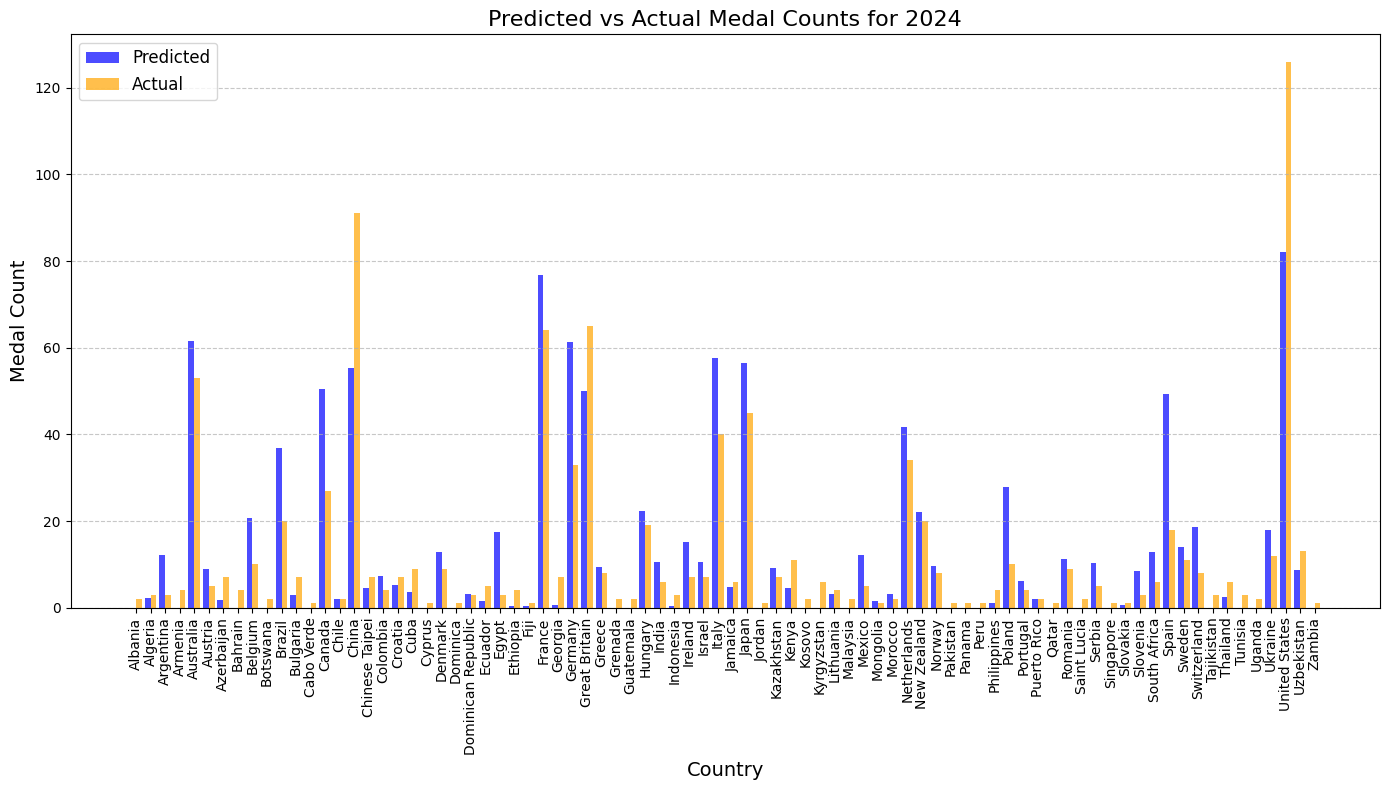

In [149]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Step 6: Handle missing values (if any) before calculating MSE
# Drop rows with missing actual or predicted values
comparison_cleaned = comparison.dropna(subset=['Total', 'Predicted_Medals_2024'])
comparison_cleaned['Predicted_Medals_2024'] = np.clip(comparison_cleaned['Predicted_Medals_2024'], 0, None)

# Step 7: Calculate Mean Squared Error (MSE)
mse = mean_squared_error(comparison_cleaned['Total'], comparison_cleaned['Predicted_Medals_2024'])
print(f"Mean Squared Error (MSE) for 2024 medal predictions: {mse:.2f}")

# Step 8: Plot predicted vs actual data for 2024 using a bar graph
# Set up positions for the bars
x = np.arange(len(comparison_cleaned))  # Number of countries
width = 0.4  # Bar width

# Create the bar plot
plt.figure(figsize=(14, 8))

# Plot predicted and actual medal counts
plt.bar(x - width / 2, comparison_cleaned['Predicted_Medals_2024'], width, label="Predicted", color='blue', alpha=0.7)
plt.bar(x + width / 2, comparison_cleaned['Total'], width, label="Actual", color='orange', alpha=0.7)

# Add labels and title
plt.title("Predicted vs Actual Medal Counts for 2024", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Medal Count", fontsize=14)
plt.xticks(x, comparison_cleaned['NOC'], rotation=90, fontsize=10)  # Country codes on x-axis
plt.legend(fontsize=12)

# Add grid for y-axis to improve readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [160]:
# Step 1: Merge athlete data with medal data (assuming 'athletes_per_country_year' and 'merged_data' are ready)
athletes_2024 = athletes_per_country_year[athletes_per_country_year['Year'] < 2024]
merged_2024 = pd.merge(athletes_2024, df[df['Year'] < 2024][['NOC', 'Total']], on='NOC', how='left')
merged_2024['Total'] = merged_2024['Total'].fillna(0)

# Step 2: Calculate the Pearson correlation coefficient
correlation_athletes_medals = np.corrcoef(merged_2024['Num_Athletes'], merged_2024['Total'])[0, 1]
correlation_athletes_medals

np.float64(0.5570597367476273)

In [166]:
aligned_predicted

NOC
Afghanistan       0.8
Albania           0.0
Algeria           0.0
Argentina         4.0
Armenia           5.6
                 ... 
Virgin Islands    0.0
West Germany      0.0
Yugoslavia        0.0
Zambia            0.0
Zimbabwe          0.2
Length: 164, dtype: float64

In [172]:
aligned_predicted_df = aligned_predicted.reset_index()
aligned_predicted_df.columns = ['NOC', 'Predicted_Medals_2024'] 

In [173]:
aligned_predicted_df


,NOC,Predicted_Medals_2024
0,Afghanistan,0.8
1,Albania,0.0
2,Algeria,0.0
3,Argentina,4.0
4,Armenia,5.6
...,...,...
159,Virgin Islands,0.0
160,West Germany,0.0
161,Yugoslavia,0.0
162,Zambia,0.0


In [177]:
merged_data = pd.merge(comparison_cleaned, aligned_predicted_df, on='NOC', how='inner')
merged_data

,NOC,Year,Num_Athletes,Predicted_Medals_2024_x,Total,Predicted_Medals_2024_y
0,Albania,2024,9,0.000000,2.0,0.0
1,Algeria,2024,55,2.278987,3.0,0.0
2,Argentina,2024,154,12.156422,3.0,4.0
3,Armenia,2024,17,0.000000,4.0,5.6
4,Australia,2024,649,61.543599,53.0,14.4
...,...,...,...,...,...,...
77,Uganda,2024,27,0.000000,2.0,0.6
78,Ukraine,2024,212,17.943203,12.0,8.6
79,United States,2024,854,81.996874,126.0,129.8
80,Uzbekistan,2024,119,8.664400,13.0,12.2


In [178]:
merged_data['Average_Predicted_Medals_2024'] = merged_data[['Predicted_Medals_2024_x', 'Predicted_Medals_2024_y']].mean(axis=1)


In [179]:
merged_data['Average_Predicted_Medals_2024']

0       0.000000
1       1.139494
2       8.078211
3       2.800000
4      37.971799
         ...    
77      0.300000
78     13.271601
79    105.898437
80     10.432200
81      0.000000
Name: Average_Predicted_Medals_2024, Length: 82, dtype: float64

Mean Squared Error (MSE) for 2024 medal predictions: 30.19


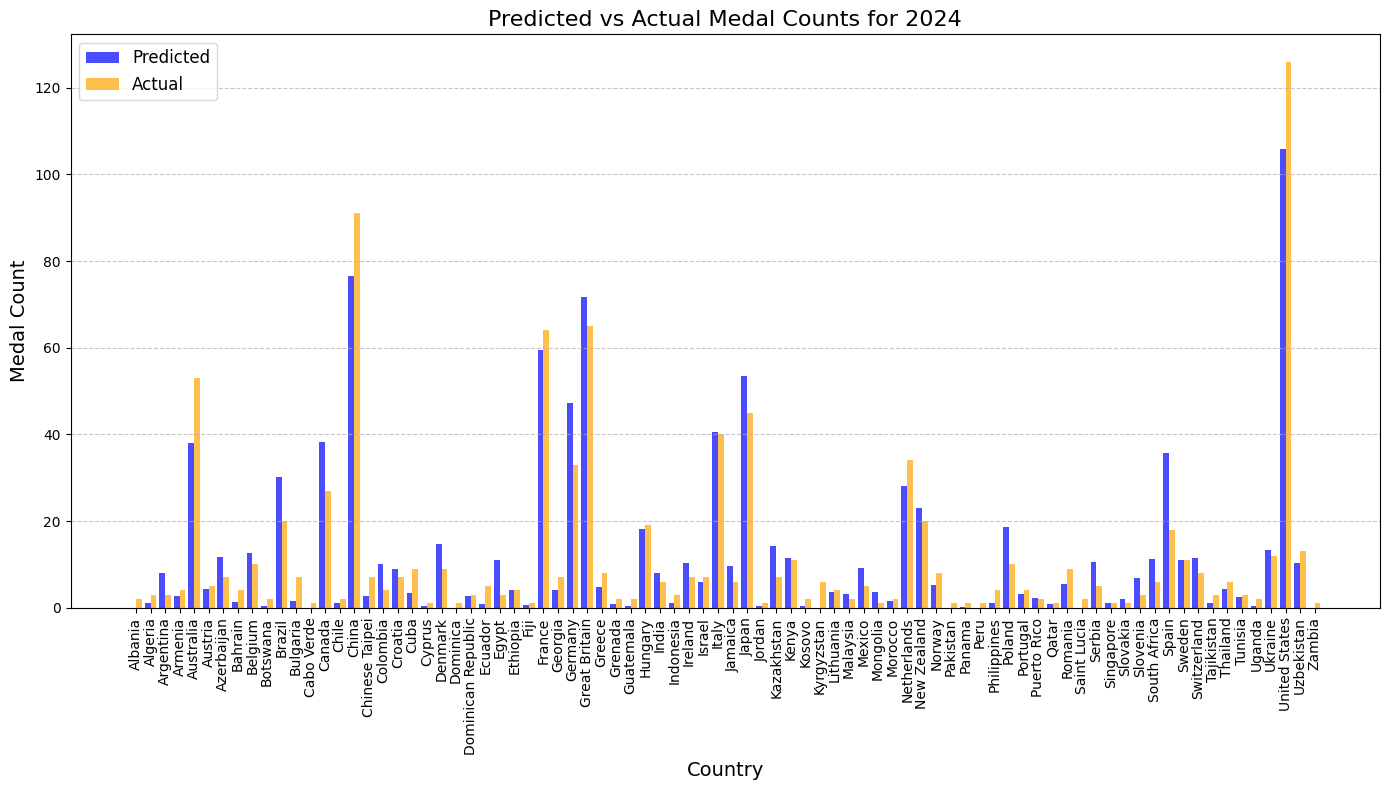

In [180]:
# Step 7: Calculate Mean Squared Error (MSE)
mse = mean_squared_error(comparison_cleaned['Total'], merged_data['Average_Predicted_Medals_2024'])
print(f"Mean Squared Error (MSE) for 2024 medal predictions: {mse:.2f}")

# Step 8: Plot predicted vs actual data for 2024 using a bar graph
# Set up positions for the bars
x = np.arange(len(comparison_cleaned))  # Number of countries
width = 0.4  # Bar width

# Create the bar plot
plt.figure(figsize=(14, 8))

# Plot predicted and actual medal counts
plt.bar(x - width / 2, merged_data['Average_Predicted_Medals_2024'], width, label="Predicted", color='blue', alpha=0.7)
plt.bar(x + width / 2, comparison_cleaned['Total'], width, label="Actual", color='orange', alpha=0.7)

# Add labels and title
plt.title("Predicted vs Actual Medal Counts for 2024", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Medal Count", fontsize=14)
plt.xticks(x, comparison_cleaned['NOC'], rotation=90, fontsize=10)  # Country codes on x-axis
plt.legend(fontsize=12)

# Add grid for y-axis to improve readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [199]:
file_path = '2025_Problem_C_Data/summerOly_medal_counts_utf8.csv'
df = pd.read_csv(file_path)

In [200]:
pivot_data = df.pivot(index='Year', columns='NOC', values='Gold').fillna(0)


In [201]:
# Step 1: Filter data for the last five Olympic years
last_five_years = [2004, 2008, 2012, 2016, 2020]  # Adjust as necessary
pivot_data_last_five_years = pivot_data.loc[last_five_years]

# Step 2: Extract actual data for 2024
actual_2024_data = pivot_data.loc[2024]  # Assuming 2024 data exists in pivot_data

# Step 3: Train linear regression models for each country
regressor = LinearRegression()
predictions_2024 = {}  # Store predictions

# Features (years) and reshape for sklearn
X = np.array(last_five_years).reshape(-1, 1)  # Independent variable (years)

for country in pivot_data.columns:
    # Medal counts for the last five years for the current country
    y = pivot_data_last_five_years[country].values
    
    # Train a linear regression model
    regressor.fit(X, y)
    
    # Predict medal count for 2024
    predictions_2024[country] = regressor.predict([[2024]])[0]

# Step 4: Compare predictions with actual 2024 data
# Convert predictions and actual data to Series for easier alignment
predicted_2024 = pd.Series(predictions_2024)
predicted_2024 = predicted_2024.clip(lower=0)
actual_2024 = actual_2024_data

# Ensure alignment of indices
aligned_actual = actual_2024[actual_2024.index.isin(predicted_2024.index)]
aligned_predicted = predicted_2024[aligned_actual.index]

# Step 5: Calculate Mean Squared Error (MSE)
mse = mean_squared_error(aligned_actual, aligned_predicted)
print(f"Mean Squared Error (MSE) for 2024 predictions: {mse:.2f}")

# Display predictions vs actual data
comparison = pd.DataFrame({
    "Predicted": aligned_predicted,
    "Actual": aligned_actual
})
print(comparison)

Mean Squared Error (MSE) for 2024 predictions: 6.04
                Predicted  Actual
NOC                              
Afghanistan           0.0     0.0
Albania               0.0     0.0
Algeria               0.2     2.0
Argentina             0.7     1.0
Armenia               0.5     0.0
...                   ...     ...
Virgin Islands        0.0     0.0
West Germany          0.0     0.0
Yugoslavia            0.0     0.0
Zambia                0.0     0.0
Zimbabwe              0.0     0.0

[164 rows x 2 columns]


In [202]:
athlete = pd.read_csv('2025_Problem_C_Data/summerOly_athletes_utf8.csv')
athlete.loc[athlete['NOC'] == 'AIN', 'NOC'] = 'RUS'
athlete.loc[athlete['NOC'] == 'RUS', 'Team'] = 'Russia'
athlete = athlete.rename(columns={'NOC': 'NOC_Code'})
athlete = athlete.rename(columns={'Team': 'NOC'})

In [203]:
athletes_per_country_year = athlete.groupby(['NOC', 'Year']).size().reset_index(name='Num_Athletes')
# Step 2: Filter the medal counts data for the last five Olympic years (2000, 2004, 2008, 2012, 2016)
last_five_years = [2004, 2008, 2012, 2016, 2020]
historical_data = df[df['Year'].isin(last_five_years)]

# Step 3: Merge the athlete data with the medal counts data
merged_data = pd.merge(athletes_per_country_year, historical_data[['NOC', 'Year', 'Gold']], on=['NOC', 'Year'])

# Step 4: Train the linear regression model using the last 5 years' data
X = merged_data[['Num_Athletes']]  # Number of athletes as feature
y = merged_data['Gold']  # Total medals as target

# Initialize and train the linear regression model
regressor = LinearRegression()
regressor.fit(X, y)

# Step 5: Make predictions for 2024 using the number of athletes for 2024
athletes_2024 = athletes_per_country_year[athletes_per_country_year['Year'] == 2024]
X_2024 = athletes_2024[['Num_Athletes']]  # Number of athletes for 2024
predicted_medals_2024 = regressor.predict(X_2024)

# Add the predictions to the dataframe
athletes_2024['Predicted_Medals_2024'] = predicted_medals_2024

# Display the predictions
print(athletes_2024[['NOC', 'Num_Athletes', 'Predicted_Medals_2024']])

# Step 6: Compare predictions with actual 2024 data (if available)
actual_2024_data = df[df['Year'] == 2024][['NOC', 'Gold']]

# Merge predictions with actual data
comparison = pd.merge(athletes_2024, actual_2024_data, on='NOC', how='left')

# Display the comparison
print(comparison)

#Step 6: Handle missing values (if any) before calculating MSE
# Drop rows with missing actual or predicted values
comparison_cleaned = comparison.dropna(subset=['Gold', 'Predicted_Medals_2024'])
comparison_cleaned['Predicted_Medals_2024'] = np.clip(comparison_cleaned['Predicted_Medals_2024'], 0, None)

# Step 7: Calculate Mean Squared Error (MSE)
mse = mean_squared_error(comparison_cleaned['Gold'], comparison_cleaned['Predicted_Medals_2024'])
print(f"Mean Squared Error (MSE) for 2024 medal predictions: {mse:.2f}")



                     NOC  Num_Athletes  Predicted_Medals_2024
19           Afghanistan             7              -1.255073
31               Albania             9              -1.185176
52               Algeria            55               0.422455
71        American Samoa             2              -1.429815
90               Andorra             4              -1.359918
...                  ...           ...                    ...
4411   Virgin Islands, B             4              -1.359918
4412  Virgin Islands, US             5              -1.324970
4455               Yemen             4              -1.359918
4495              Zambia            32              -0.381361
4511            Zimbabwe             7              -1.255073

[206 rows x 3 columns]
                    NOC  Year  Num_Athletes  Predicted_Medals_2024  Gold
0           Afghanistan  2024             7              -1.255073   NaN
1               Albania  2024             9              -1.185176   0.0
2            

/var/folders/57/f1b6dp4j2g96pfwxt0xskpxr0000gn/T/ipykernel_10495/3286206581.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  athletes_2024['Predicted_Medals_2024'] = predicted_medals_2024
/var/folders/57/f1b6dp4j2g96pfwxt0xskpxr0000gn/T/ipykernel_10495/3286206581.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison_cleaned['Predicted_Medals_2024'] = np.clip(comparison_cleaned['Predicted_Medals_2024'], 0, None)


In [204]:
aligned_predicted_df = aligned_predicted.reset_index()
aligned_predicted_df.columns = ['NOC', 'Predicted_Medals_2024'] 
merged_data = pd.merge(comparison_cleaned, aligned_predicted_df, on='NOC', how='inner')
merged_data['Average_Predicted_Medals_2024'] = merged_data[['Predicted_Medals_2024_x', 'Predicted_Medals_2024_y']].mean(axis=1)
merged_data['Average_Predicted_Medals_2024']

0      0.000000
1      0.311227
2      2.291178
3      0.250000
4     16.090929
        ...    
77     0.900000
78     2.954684
79    37.073149
80     3.129579
81     0.000000
Name: Average_Predicted_Medals_2024, Length: 82, dtype: float64

Mean Squared Error (MSE) for 2024 medal predictions: 7.20


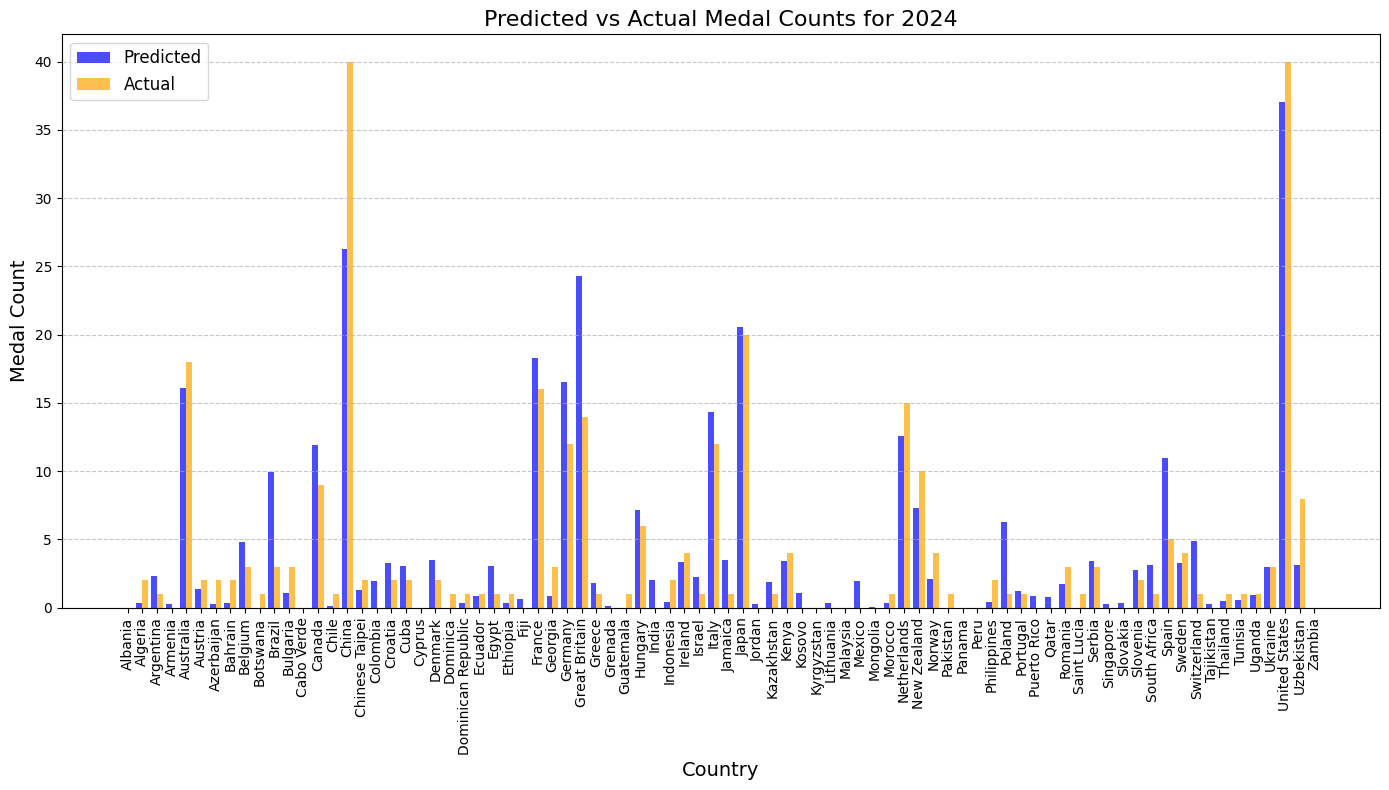

In [205]:
# Step 7: Calculate Mean Squared Error (MSE)
mse = mean_squared_error(comparison_cleaned['Gold'], merged_data['Average_Predicted_Medals_2024'])
print(f"Mean Squared Error (MSE) for 2024 medal predictions: {mse:.2f}")

# Step 8: Plot predicted vs actual data for 2024 using a bar graph
# Set up positions for the bars
x = np.arange(len(comparison_cleaned))  # Number of countries
width = 0.4  # Bar width

# Create the bar plot
plt.figure(figsize=(14, 8))

# Plot predicted and actual medal counts
plt.bar(x - width / 2, merged_data['Average_Predicted_Medals_2024'], width, label="Predicted", color='blue', alpha=0.7)
plt.bar(x + width / 2, comparison_cleaned['Gold'], width, label="Actual", color='orange', alpha=0.7)

# Add labels and title
plt.title("Predicted vs Actual Medal Counts for 2024", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Medal Count", fontsize=14)
plt.xticks(x, comparison_cleaned['NOC'], rotation=90, fontsize=10)  # Country codes on x-axis
plt.legend(fontsize=12)

# Add grid for y-axis to improve readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()